In [2]:
# loading packages
%matplotlib inline                              
from matplotlib import pyplot as plt
import numpy as np
from keras import layers 
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import os
import shutil

In [6]:
# creating project data directory
main_dir = 'E:\PROGRAM\ML\ML_Projects\cell-images'
os.mkdir(main_dir)

# creating train data directory
train, validation/development and test directories
train_dir = os.path.join(main_dir, 'train_set')
os.mkdir(train_dir)

# creating validation/development data directory
dev_dir = os.path.join(main_dir, 'dev_set') 
os.mkdir(dev_dir)

# creating test data directory
test_dir = os.path.join(main_dir, 'test_set')
os.mkdir(test_dir)

In [8]:
# input directories to train, test and validation directories
train_parasitized_dir = os.path.join(train_dir, 'parasitized')
os.mkdir(train_parasitized_dir)
train_uninfected_dir = os.path.join(train_dir, 'uninfected')
os.mkdir(train_uninfected_dir)

dev_parasitized_dir = os.path.join(dev_dir, 'parasitized') 
os.mkdir(dev_parasitized_dir)
dev_uninfected_dir = os.path.join(dev_dir, 'uninfected') 
os.mkdir(dev_uninfected_dir)

test_parasitized_dir = os.path.join(test_dir, 'parasitized') 
os.mkdir(test_parasitized_dir)
test_uninfected_dir = os.path.join(test_dir, 'uninfected')
os.mkdir(test_uninfected_dir)

In [14]:
# renaming files in original directory
parfile_dir = "E:/PROGRAM/Data/cell_images/Parasitized/"
os.chdir(parfile_dir)
name_count = 0
for filename in os.listdir(parfile_dir):
    new_name = 'Parasitized.{}.png'.format(name_count)
    os.rename(filename, new_name)
    name_count += 1

unfile_dir = "E:/PROGRAM/Data/cell_images/Uninfected/"
os.chdir(unfile_dir)
name_count = 0
for filename in os.listdir(unfile_dir):
    new_name = 'Uninfected.{}.png'.format(name_count)
    os.rename(filename, new_name)
    name_count += 1

In [12]:
# loading parasitized images into project directories
images = ['Parasitized.{}.png'.format(i) for i in range(0, 1000)] 
for image in images:
    src = os.path.join(parfile_dir, image) 
    dst = os.path.join(train_parasitized_dir, image) 
    shutil.copyfile(src, dst)

images = ['Parasitized.{}.png'.format(i) for i in range(1000, 1500)]
for image in images:
    src = os.path.join(parfile_dir, image) 
    dst = os.path.join(dev_parasitized_dir, image)
    shutil.copyfile(src, dst)
    
images = ['Parasitized.{}.png'.format(i) for i in range(1500, 2000)]
for image in images:
    src = os.path.join(parfile_dir, image) 
    dst = os.path.join(test_parasitized_dir, image)
    shutil.copyfile(src, dst)

In [15]:
# loading uninfected images into project directories
images = ['Uninfected.{}.png'.format(i) for i in range(0, 1000)] 
for image in images:
    src = os.path.join(unfile_dir, image) 
    dst = os.path.join(train_uninfected_dir, image) 
    shutil.copyfile(src, dst)

images = ['Uninfected.{}.png'.format(i) for i in range(1000, 1500)]
for image in images:
    src = os.path.join(unfile_dir, image) 
    dst = os.path.join(dev_uninfected_dir, image)
    shutil.copyfile(src, dst)
    
images = ['Uninfected.{}.png'.format(i) for i in range(1500, 2000)]
for image in images:
    src = os.path.join(unfile_dir, image) 
    dst = os.path.join(test_uninfected_dir, image)
    shutil.copyfile(src, dst)

In [18]:
# showing number of train, validation and test data
print('total training parasitized images:{}'.format(
    len(os.listdir(train_parasitized_dir))))
print('total training uninfected images:{}'.format(
    len(os.listdir(train_uninfected_dir))))
print('total validation or development parasitized images:{}'.format(
    len(os.listdir(dev_parasitized_dir))))
print('total validation or development uninfected images:{}'.format(
    len(os.listdir(dev_uninfected_dir)))) 
print('total test parasitized images:{}'.format(
    len(os.listdir(test_parasitized_dir))))
print('total test uninfected images:{}'.format(
    len(os.listdir(test_uninfected_dir))))

total training parasitized images:1000
total training uninfected images:1000
total validation or development parasitized images:500
total validation or development uninfected images:500
total test parasitized images:500
total test uninfected images:500


In [69]:
par_imgs = [os.path.join(train_parasitized_dir, par_img) for 
             par_img in os.listdir(train_parasitized_dir)]

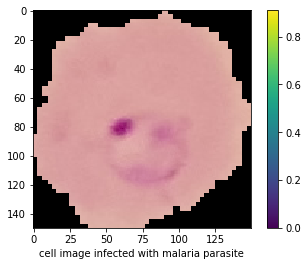

In [88]:
# showing parasitized cell image
par_img = par_imgs[0]              
par_img = image.load_img(par_img , target_size=(150, 150))
par_img= image.img_to_array(par_img) 

plt.figure()
plt.imshow(par_img/255)
plt.colorbar()
plt.grid(False)
plt.xlabel('cell image infected with malaria parasite')
plt.show()

In [74]:
uninf_imgs = [os.path.join(train_uninfected_dir, par_img) for 
             par_img in os.listdir(train_uninfected_dir)]

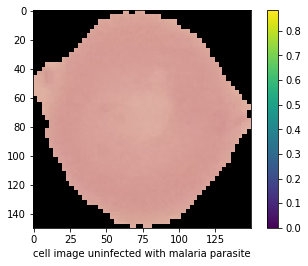

In [89]:
# showing uninfected cell image
uninf_img = uninf_imgs[0]              
uninf_img = image.load_img(uninf_img, target_size=(150, 150))
uninf_img= image.img_to_array(uninf_img) 

plt.figure()
plt.imshow(uninf_img/255)
plt.colorbar()
plt.grid(False)
plt.xlabel('cell image uninfected with malaria parasite')
plt.show()

In [20]:
# data preprocessing
train_data_generator = ImageDataGenerator(rescale=1./255) 
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('train data batch shape:{}'.format(data_batch.shape)) 
    print('train labels batch shape:{}'.format(labels_batch.shape))
    break

dev_generator = test_data_generator.flow_from_directory(
    dev_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in dev_generator:
    print('validation data batch shape:{}'.format(data_batch.shape))
    print('validation labels batch shape:{}'.format(labels_batch.shape))
    break

Found 2000 images belonging to 2 classes.
train data batch shape:(20, 150, 150, 3)
train labels batch shape:(20,)
Found 1000 images belonging to 2 classes.
validation data batch shape:(20, 150, 150, 3)
validation labels batch shape:(20,)


In [21]:
# defining model architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [23]:
# defining model parameters
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [25]:
# training model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=dev_generator, 
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 730s 7s/step - loss: 0.6087 - acc: 0.6720 - val_loss: 0.4874 - val_acc: 0.7940
Epoch 2/20
100/100 [==============================] - 690s 7s/step - loss: 0.5023 - acc: 0.7710 - val_loss: 0.4876 - val_acc: 0.7720
Epoch 3/20
100/100 [==============================] - 1398s 14s/step - loss: 0.4475 - acc: 0.8080 - val_loss: 0.4353 - val_acc: 0.8210
Epoch 4/20
100/100 [==============================] - 10832s 108s/step - loss: 0.3825 - acc: 0.8465 - val_loss: 0.3965 - val_acc: 0.8170
Epoch 5/20
100/100 [==============================] - 759s 8s/step - loss: 0.3133 - acc: 0.8680 - val_loss: 0.5803 - val_acc: 0.6750
Epoch 6/20
100/100 [==============================] - 804s 8s/step - loss: 0.2405 - acc: 0.9060 - val_loss: 0.2771 - val_acc: 0.8740
Epoch 7/20
100/100 [==============================] - 724s 7s/step - loss: 0.2098 - acc: 0.9265 - val_loss: 0.3092 - val_acc: 0.8680
Epoch 8/20
100/100 [==============================] - 716s 7s/s

In [26]:
# saving model
model.save('malaria_cell_image_detect_1_h5')

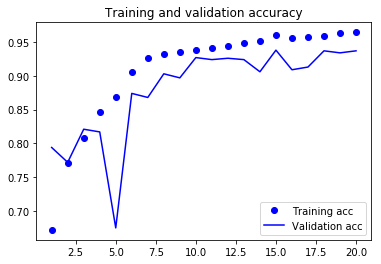

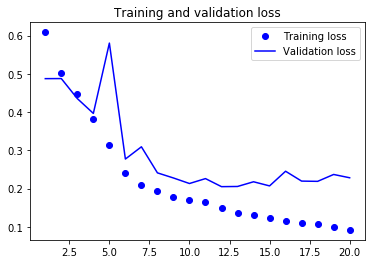

In [27]:
# plotting training and validation accuracy and losses
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# applying dropouts for regularization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [32]:
# training with data-augmentation generators

train_data_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

dev_generator = test_data_generator.flow_from_directory(
    dev_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, 
    epochs=20,
    validation_data=dev_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 1252s 13s/step - loss: 0.6291 - acc: 0.6384 - val_loss: 0.5192 - val_acc: 0.7341
Epoch 2/20
100/100 [==============================] - 1211s 12s/step - loss: 0.5311 - acc: 0.7531 - val_loss: 0.4677 - val_acc: 0.7822
Epoch 3/20
100/100 [==============================] - 1750s 18s/step - loss: 0.4793 - acc: 0.7897 - val_loss: 0.4200 - val_acc: 0.7938
Epoch 4/20
100/100 [==============================] - 1153s 12s/step - loss: 0.4295 - acc: 0.8287 - val_loss: 0.3836 - val_acc: 0.8305
Epoch 5/20
100/100 [==============================] - 1241s 12s/step - loss: 0.3745 - acc: 0.8544 - val_loss: 0.3344 - val_acc: 0.8458
Epoch 6/20
100/100 [==============================] - 1181s 12s/step - loss: 0.3311 - acc: 0.8678 - val_loss: 0.3589 - val_acc: 0.8705
Epoch 7/20
100/100 [==============================] - 1197s 12s/step - loss: 0.3103 - acc: 0.8784 - val_loss: 0.2850 - val_acc: 0.8668
Epoch 8/20
100/100 [==============================] - 1

In [34]:
model.save('malaria_cell_image_detect_2_h5')

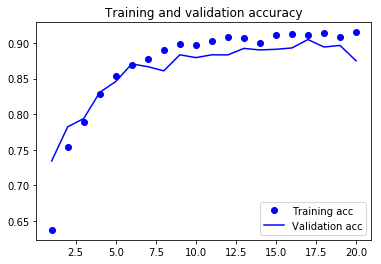

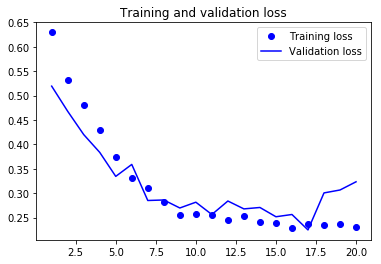

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()